## Задание 1

a) $\mathbb{P}_i = 1$ - вероятность встретить нового таксиста в первый день

Тогда вероятность встретить нового таксиста в день $j - \mathbb{P}_j = \frac{n-j}{n}$

Таким образом, вероятность за первые 9 дней не встретить ни одного новго таксиста:

$$
\mathbb{P} = \prod_{i=1}^8 \frac{n-i}{n}
$$

Вероятность встретить того же таксиста, что и раньше: 
$$
\mathbb{P} = \frac{9}{n}
$$

Тогда функция правдоподобия будет иметь вид:

$$
\mathbb{L} = \frac{9}{n^9}*\prod_{i=1}^8( n-i)\\
\ln{\mathbb{L}} = \ln{9} - 9*\ln{n} + \sum_{i = 1}^8 \ln{(n-i)}\\
\frac{\partial \ln{\mathbb{L}}}{\partial n} = -\frac{9}{\hat{n}_{ML}} + \sum_{i = 1}^8 \frac{1}{\hat{n}_{ML}-i} = 0 \ (1)\\
\frac{\partial^2 \ln{\mathbb{L}}}{\partial n^2} = \frac{9}{n^2} - \sum_{i = 1}^8 \frac{1}{(n-i)^2} < 0 
$$

Решая уравнение (1) с помощью WolframAlpha получу (предполагая, что n - целое):

$$
\hat{n}_{ML} = 42
$$

Ниже приведено построение графика функции правдоподобия:

In [89]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tqdm

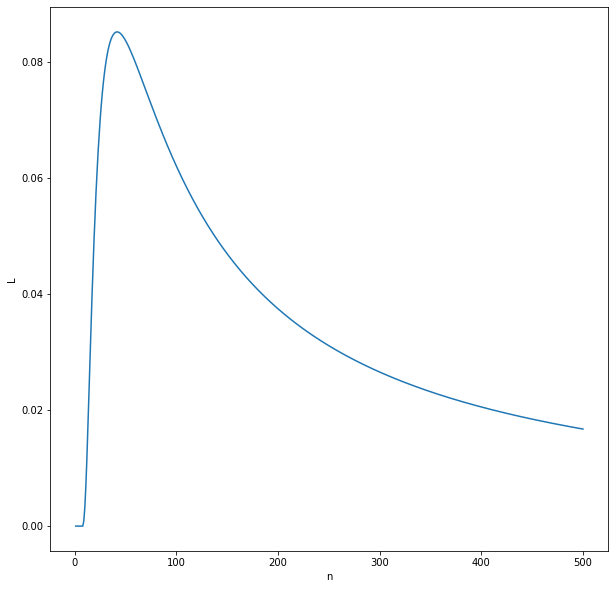

In [90]:
func = np.array([9/(i**9)*(i-1)*(i-2)*(i-3)*(i-4)*(i-5)*(i-6)*(i-7)*(i-8) for i in range(1,501)])
val = np.array(range(1,501))

plt.figure(figsize = (10,10))
plt.xlabel('n')
plt.ylabel('L')
plt.plot(val, func);

b) Вероятность встретить повторно таксиста во второй день - $\mathbb{P}_2 = 1*\frac{n - 1}{n}$

Вероятность встретить в трейтий день - $\mathbb{P}_3 = 1*\frac{(n-2)(n-1)}{n^2}$

Вероятность встретить в четвертый день - $\mathbb{P}_4 = 1*\frac{(n-1)(n-2)(n-3) }{n^3}$

Тогда вероятность встретить таксиста на i-й день будет иметь вид: 

$$
\mathbb{P}_i = \frac{(i-1)\prod_{j = 1}^{i-2} (n-j)}{n^{i-1}}
$$

Тогда математическое ожидание будет иметь вид:

$$
\mathbb{E} = \sum_{i = 2}^{n+1} i*\mathbb{P}_i
$$

Сделаю оценку числа n методом моментов:

$$
\bar X = 10\\
\bar X = \mathbb{E}
$$

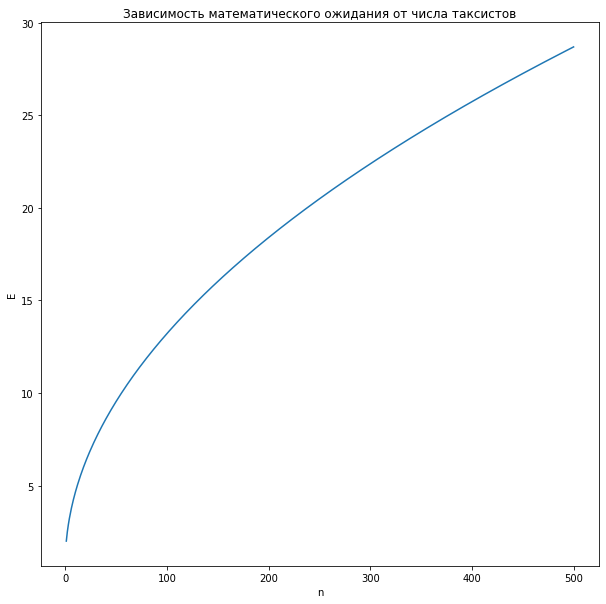

In [91]:
exp_value = []
for n in val: 
    exp_val = 0
    for i in range(2, n+2): 
        prob = (i - 1)/n
        for j in range(1, i-1): 
            prob *= (n - j)/n
        exp_val += i*prob
    exp_value.append(exp_val)

plt.figure(figsize = (10,10))
plt.xlabel('n')
plt.ylabel('E')
plt.plot(val, exp_value)
plt.title('Зависимость математического ожидания от числа таксистов');

Так как число таксистов - целое, то оценка методом моментов будет происходить по тому, на сколько близким получилось матожидание к выборочному среднему:

In [92]:
exp_value = np.array(exp_value)
difference = abs(exp_value - 10)
val[np.argmin(difference)]

55

Тогда оценка методом моментов получится:
$$
\hat n_{MM} = 55
$$

c) Буду симулировать:

In [93]:
n = range(1,101)
samples = []
np.random.seed(1)
for i in tqdm.tqdm(range(10000)): 
    x = [np.random.choice(n,1)]
    j = 1
    while True: 
        j += 1
        x1 = np.random.choice(n,1)
        if x1 in x: break
        else: x.append(x1)
    samples.append(j)

100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6458.44it/s]


In [94]:
MM = []
for sample in tqdm.tqdm(samples): 
    X_sample = sample
    diff = X_sample
    n = 1
    while True: 
        exp_val = 0
        for i in range(2, n+2): 
            prob = (i - 1)/n
            for j in range(1, i-1): 
                prob *= (n - j)/n
            exp_val += i*prob
        if abs(exp_val - X_sample) < diff: 
            diff = abs(exp_val - X_sample)
        else: 
            MM.append(n)
            break
        n += 1


100%|█████████████████████████████████████| 10000/10000 [20:38<00:00,  8.07it/s]


In [95]:
ML = []
for sample in tqdm.tqdm(samples): 
    ml = 0
    L = 0
    for n in range(1,1001):
        prob = (sample - 1)/n
        for j in range(1, sample-1): 
            prob *= (n - j)/n
        if prob > L: 
            ml = n
            L = prob
    ML.append(ml)

100%|████████████████████████████████████| 10000/10000 [00:10<00:00, 998.93it/s]


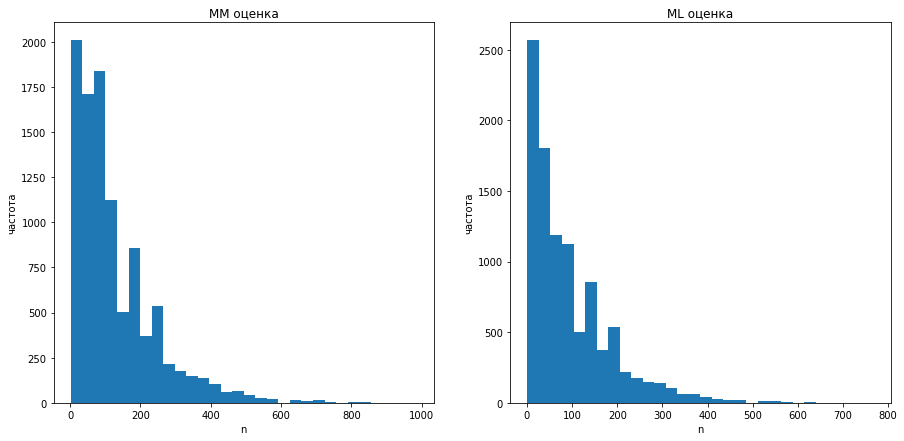

In [97]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
ax1.hist(MM, bins = 30)
ax1.set_title('MM оценка')
ax1.set_xlabel('n')
ax1.set_ylabel('частота')
ax2.hist(ML, bins = 30)
ax2.set_title('ML оценка')
ax2.set_xlabel('n')
ax2.set_ylabel('частота');

Смещение оценок рассчитывается по формуле:
$$
b = \frac{\sum_{i = 1}^{10000} \hat n_i}{10000} - n, \ n = 100
$$
Дисперсия рассчитывается по формуле:
$$
Var(\hat n) = \frac{\sum_{i=1}^{10000} (\hat n_i - n)^2}{10000-1}, \ n = \bar n
$$
MSE рассчитывается по формуле:
$$
MSE = \frac{\sum_{i=1}^{10000} (\hat n_i - 100)^2}{10000}
$$

In [98]:
MM = np.array(MM)
ML = np.array(ML)

MSE_mm = np.sum((MM - 100)**2)/10000
MSE_ml = np.sum((ML - 100)**2)/10000

In [99]:
print(f'Смещение для MM оценки: {MM.mean() - 100}')
print(f'Смещение для ML оценки: {ML.mean() - 100}')
print(f'Дисперсия для MM оценки: {MM.var(ddof = 1)}')
print(f'Дисперсия для ML оценки: {ML.var(ddof = 1)}')
print(f'MSE MM оценки: {MSE_mm}')
print(f'MSE ML оценки: {MSE_ml}')

Смещение для MM оценки: 25.556200000000004
Смещение для ML оценки: -4.520499999999998
Дисперсия для MM оценки: 14021.666208180819
Дисперсия для ML оценки: 8462.466426392639
MSE MM оценки: 14673.3834
MSE ML оценки: 8482.0551


## Задание 2

а) $\mathbb{P}_1 = 1$ - вероятность встретить первое уникальное имя

$\mathbb{P}_i = \frac{n-i}{n}$ - вероятность встретить i-е уникальное имя

Тогда получается, что вероятность встретить только уникальные имена будет равна (их количество k, причем $k \leq n$:
$$
\mathbb{P}_{unique} = 1*\prod_{i = 1}^{k-1} \frac{n-i}{n}
$$

Также нужно учитывать вероятность встретить повторяющееся имя, то есть для k имен существуют вероятности повторения равные:
$$
\mathbb{P}_i = \frac{i}{n}
$$
где i это количество уникальных уже встреченных имен.

При заданном k (например, в этом пункте $k = 6$) вероятность встретить уже известное имя будет равна сумме вероятностей того, когда эти имена можно будет встретить. 

Например, при $k = 2$ и 4 поездках, вероятность встретить известные имена будет равна:
$$
\mathbb{P} = ((\frac{1}{n})^2 + (\frac{1*2}{n*n}) + (\frac{2}{n})^2)  = \frac{1 + 2 + 4}{n^2}
$$
То есть вне зависимости от того, когда встретится знакомое имя, общая вероятность будет иметь вид:

$$
\mathbb{P}_{familiar} = \frac{const}{n^k}
$$
Тогда получу функцию правдоподобия, которая будет иметь вид:
$$
L(n) = \mathbb{P}_{unique}*\mathbb{P}_{familiar} = \frac{const}{n^{n-k}} * \prod_{i = 1}^{k-1} \frac{n-i}{n} 
$$

В случае, где $k = 6$ посчитаю константу: 


In [100]:
familiar_freq = 4
const = 0
for f in range(1,7):
    for s in range(f,7):
        for t in range(s,7): 
            for fo in range(t,7):
                const += f*s*t*fo
                
print(const)

22827


Итоговая функция правдоподобия будет иметь вид:

$$
\mathbb{L} = \frac{22827}{n^4}\prod_{i = 1}^{5} \frac{n-i}{n}
$$

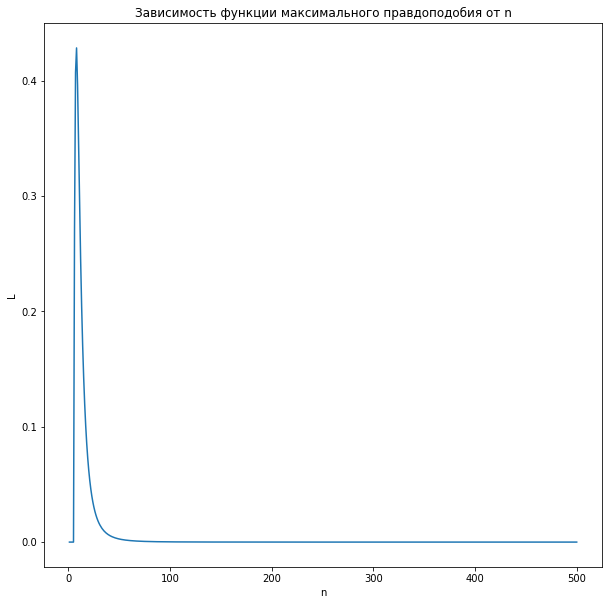

In [101]:
func = []
for i in val: 
    L = 22827/i**4
    for j in range(1,6): 
        L *= (i - j)/i
    func.append(L)


plt.figure(figsize = (10,10))
plt.xlabel('n')
plt.ylabel('L')
plt.plot(val, func)
plt.title('Зависимость функции максимального правдоподобия от n');

In [102]:
print(val[np.argmax(func)])

8


Тогда:

$$
\hat n_{ML} = 8
$$

b) Из предыдущего пункта:

$$
\mathbb{P}(X = k) = \frac{const}{n^{m-k}}*\prod_{i=1}^{k-1} \frac{n-i}{n}
$$
Рассчитаю константы при каждом k: 

In [103]:
constant = []
for unique in range(1,11): 
    freq = 10 - unique
    const = 0
    for q in range(1,unique+1): 
        if freq > 1: 
            for w in range(q,unique+1): 
                if freq > 2: 
                    for e in range(w,unique+1): 
                        if freq > 3: 
                            for r in range(e,unique+1):
                                if freq > 4:
                                    for t in range(r,unique+1):
                                        if freq > 5:
                                            for y in range(t,unique+1):
                                                if freq > 6:
                                                    for u in range(y,unique+1):
                                                        if freq > 7:
                                                            for i in range(u,unique+1): 
                                                                if freq > 8: 
                                                                    for o in range(i,unique+1): 
                                                                        const += q*w*e*r*t*y*u*i*o
                                                                else:const += q*w*e*r*t*y*u*i
                                                        else:const += q*w*e*r*t*y*u
                                                else:const += q*w*e*r*t*y
                                        else:const += q*w*e*r*t
                                else:const += q*w*e*r
                        else:const += q*w*e
                else:const += q*w
        else:const += q
    constant.append(const) 

In [104]:
constant

[1, 511, 9330, 34105, 42525, 22827, 5880, 750, 45, 55]

$$
\mathbb{E} =\sum_{i = 1}^{10} \mathbb{P}(X = i) * i
$$

In [105]:
expected_value = []

for n in tqdm.tqdm(val):
    exp_value = 0
    for i in range(1,11): 
        if i == 10: prob = 1
        else: prob = constant[i-1] / n**(10-i)
        for j in range(1,i): 
            prob *= (n-j) / n
        exp_value += i*prob
    expected_value.append(exp_value)

  0%|                                                   | 0/500 [00:00<?, ?it/s]/var/folders/rc/b_nvtwmd0qg362d8llqqm0j40000gn/T/ipykernel_12768/120476765.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  else: prob = constant[i-1] / n**(10-i)
100%|██████████████████████████████████████| 500/500 [00:00<00:00, 24880.79it/s]


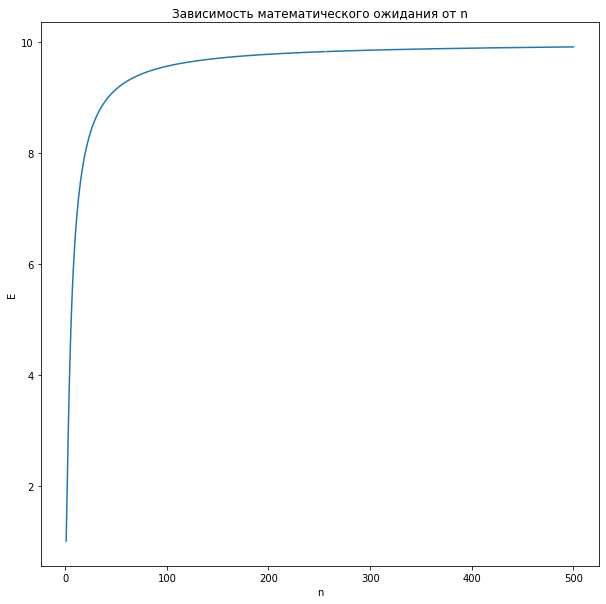

In [106]:
plt.figure(figsize = (10,10))
plt.xlabel('n')
plt.ylabel('E')
plt.plot(val, expected_value)
plt.title('Зависимость математического ожидания от n');

In [107]:
expected_value = np.array(expected_value)
difference = abs(expected_value - 6)
val[np.argmin(difference)]

8

Тогда оценка методом моментов:

$$
\hat n_{MM} = 8
$$

в) Насимулирую:

In [108]:
n = range(1,21)
samples = []
np.random.seed(0)
for i in tqdm.tqdm(range(10000)): 
    driver = np.random.choice(n,10)
    samples.append(len(set(driver)))

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 85796.42it/s]


In [109]:
MM = []
for sample in tqdm.tqdm(samples): 
    if sample == 10: 
        MM.append(100)
    else: 
        n = 1
        diff = 10 
        while True:
            exp_value = 0
            for i in range(1,11): 
                if i == 10: prob = 1
                else: prob = constant[i-1] / n**(10-i)
                for j in range(1,i): 
                    prob *= (n-j) / n
                exp_value += i*prob
            if diff > abs(exp_value - sample): 
                diff = abs(exp_value - sample)
                n += 1
            else:
                MM.append(n)
                break

100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5490.38it/s]


In [110]:
ML = []
for sample in tqdm.tqdm(samples): 
    ml = 0
    L = 0
    if sample == 10: 
        ML.append(100)
    else:
        L = []
        ml = []
        for n in range(1,1001):
            for i in range(1,11): 
                if i == 10: 
                    prob = 1
                else: 
                    prob = constant[i-1]/n**(10-i)
                    for j in range(1, sample-1): 
                        prob *= (n - j)/n
                    L.append(prob)
                    ml.append(n)
        ML.append(ml[np.argmax(L)])

100%|████████████████████████████████████| 10000/10000 [01:21<00:00, 122.29it/s]


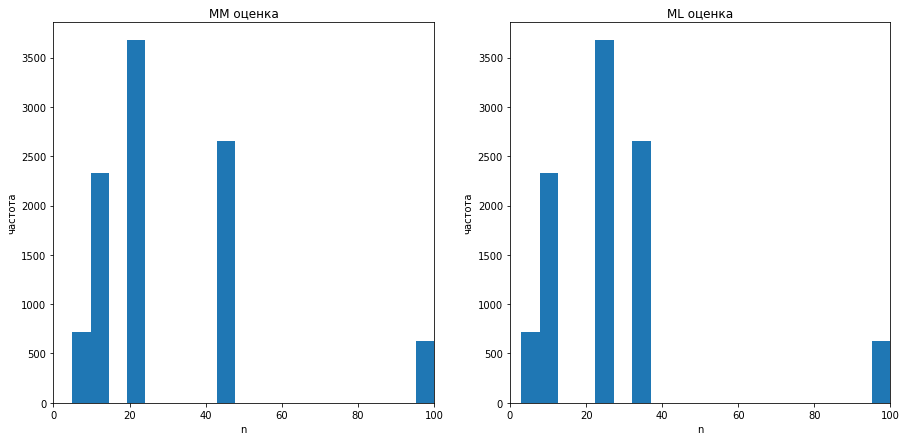

In [111]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
ax1.hist(MM, bins = 20)
ax1.set_title('MM оценка')
ax1.set_xlabel('n')
ax1.set_ylabel('частота')
ax1.set_xlim(0,100)
ax2.hist(ML, bins = 20)
ax2.set_title('ML оценка')
ax2.set_xlabel('n')
ax2.set_ylabel('частота')
ax2.set_xlim(0,100);

Смещение оценок рассчитывается по формуле:
$$
b = \frac{\sum_{i = 1}^{10000} \hat n_i}{10000} - n, \ n = 20
$$
Дисперсия рассчитывается по формуле:
$$
Var(\hat n) = \frac{\sum_{i=1}^{10000} (\hat n_i - n)^2}{10000-1}, \ n = \bar n
$$
MSE рассчитывается по формуле:
$$
MSE = \frac{\sum_{i=1}^{10000} (\hat n_i - 20)^2}{10000}
$$

In [112]:
MM = np.array(MM)
ML = np.array(ML)

MSE_mm = np.sum((MM - 20)**2)/10000
MSE_ml = np.sum((ML - 20)**2)/10000

print(f'Смещение для MM оценки: {MM.mean() - 20}')
print(f'Смещение для ML оценки: {ML.mean() - 20}')
print(f'Дисперсия для MM оценки: {MM.var(ddof = 1)}')
print(f'Дисперсия для ML оценки: {ML.var(ddof = 1)}')
print(f'MSE MM оценки: {MSE_mm}')
print(f'MSE ML оценки: {MSE_ml}')

Смещение для MM оценки: 9.0155
Смещение для ML оценки: 7.222100000000001
Дисперсия для MM оценки: 478.6815279027902
Дисперсия для ML оценки: 432.0781794079408
MSE MM оценки: 559.9129
MSE ML оценки: 484.1937


## Задание 3

$$
X_i \sim Exp(\lambda = 1) \\
f_X(x) = \begin{cases} e^{-x}, \ x \geq 0\\
0,\ else
\end{cases}
$$

Отсюда: 

$$
    \frac{\bar X - \mu_x}{\sigma / \sqrt{n}} \overset{as}\sim \mathcal N(0,1)
$$

Тогда доверительный интервал для математического ожидания составит:

$$
\bar X - Z_{\alpha / 2}*\frac{\hat\sigma}{\sqrt{n}} < \mu_x < \bar X + Z_{\alpha / 2}*\frac{\hat\sigma}{\sqrt{n}}\\
\bar X - 1.96*\frac{\hat\sigma}{\sqrt{n}} < \mu_x < \bar X + 1.96*\frac{\hat\sigma}{\sqrt{n}}
$$

а) оценка вероятности для асимптотического интервала будет иметь вид:

$$
\hat p = \frac{\sum_{i = 1}^{10000} I\{ \mu_x \ in \ CI\}}{10000}
$$

Оценка для классического асимптотического интервала:

In [113]:
from scipy.stats import expon

np.random.seed(1)
I = 0
for i in range(10000): 
    samples = expon.rvs(loc=0, scale=1, size=20)
    left_side = samples.mean() - 1.96*samples.std()/(np.sqrt(20))
    right_side = samples.mean() + 1.96*samples.std()/(np.sqrt(20))
    if 1 > left_side and 1 < right_side: 
        I += 1
print(I/10000)

0.8985


Оценка с помощью наивного бутстрепа:

In [114]:
np.random.seed(1)
I = 0
for i in tqdm.tqdm(range(10000)): 
    samples = expon.rvs(loc=0, scale=1, size=20)
    sample = np.random.choice(samples, (10000,20))
    thetas = sample.mean(axis = 1)
    left_side = np.percentile(thetas, 2.5)
    right_side = np.percentile(thetas, 97.5)
    if 1 > left_side and 1 < right_side: 
        I += 1
print(I/10000)

100%|████████████████████████████████████| 10000/10000 [00:26<00:00, 370.95it/s]

0.9044


Оценка с помощью бутстрэпа t-статистики

In [115]:
np.random.seed(1)
I = 0
for i in tqdm.tqdm(range(10000)): 
    samples = expon.rvs(loc=0, scale=1, size=20)
    theta1 = samples.mean()
    sample = np.random.choice(samples, (10000,20))
    thetas = sample.mean(axis = 1)
    std = sample.std(axis = 1)
    R = (thetas - theta1) / std
    left_side = theta1 - np.percentile(R, 2.5)*samples.std()
    right_side = theta1 - np.percentile(R, 97.5)*samples.std()
    if 1 < left_side and 1 > right_side:
        I += 1
print(I/10000)
    

100%|████████████████████████████████████| 10000/10000 [00:30<00:00, 326.10it/s]

0.9469


б) Пересчет для случайных величин с расределением Стьюдента:

$$
X_i \sim t_3
$$

Асимптотический доверительный интервал:

In [116]:
from scipy.stats import t

np.random.seed(1)
I = 0
for i in tqdm.tqdm(range(10000)): 
    samples = t.rvs(df = 3, size=20)
    left_side = samples.mean() - 1.96*samples.std()/(np.sqrt(20))
    right_side = samples.mean() + 1.96*samples.std()/(np.sqrt(20))
    if 0 > left_side and 0 < right_side: 
        I += 1
print(I/10000)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 26426.77it/s]

0.9335


Наивный бутстреп:

In [117]:
np.random.seed(1)
I = 0
for i in tqdm.tqdm(range(10000)): 
    samples = t.rvs(df = 3, size=20)
    sample = np.random.choice(samples, (10000,20))
    thetas = sample.mean(axis = 1)
    left_side = np.percentile(thetas, 2.5)
    right_side = np.percentile(thetas, 97.5)
    if 0 > left_side and 0 < right_side: 
        I += 1
print(I/10000)

100%|████████████████████████████████████| 10000/10000 [00:26<00:00, 372.11it/s]

0.9218


Бутстреп t-статистики:

In [118]:
np.random.seed(1)
I = 0
for i in tqdm.tqdm(range(10000)): 
    samples = t.rvs(df = 3, size=20)
    theta1 = samples.mean()
    sample = np.random.choice(samples, (10000,20))
    thetas = sample.mean(axis = 1)
    std = sample.std(axis = 1)
    R = (thetas - theta1) / std
    left_side = theta1 - np.percentile(R, 2.5)*samples.std()
    right_side = theta1 - np.percentile(R, 97.5)*samples.std()
    if 0 < left_side and 0 > right_side:
        I += 1
print(I/10000)

100%|████████████████████████████████████| 10000/10000 [00:30<00:00, 329.90it/s]

0.9262


в) в обоих пунктах лучшими оказались разные способы: в пункте а) наилучший результат был у бутстрепа $t$-статистики , в пункте б) у асимптотического доверительного интервала. Не смотря на то, что наблюдений достаточно для применения ЦПТ, судя по результатам задания, в случае распределения, похожего на нормальное, классический асимптотический интервал будет лучше.

## Задача 4

Подготовка данных:

In [119]:
df = pd.read_csv('22-23_hse_probability - Exam.csv')

In [120]:
df = df.iloc[5:][['Last name', 'Unnamed: 72']]

In [121]:
marks = df['Unnamed: 72'].values
names = df['Last name'].values
vowel_mark = []
not_vowel_mark = []
for i in range(len(names)): 
    if names[i][0].lower() in 'уеыаоэёяию':
        vowel_mark.append(marks[i])
    else: 
        not_vowel_mark.append(marks[i])

Для каждого пункта:

$$
H_0: \mu_v = \mu_n\\
H_1: \mu_v \not = \mu_n
$$
где $\mu_v$ - математическое ожидание результатов экзамена у тех, у кого фамилия начинается с гласной, $\mu_n$ - у кого фамилия начинается с согласной.

а) Тест Уэлча

Если нулевая гипотеза верна, то: 

$$
S_{obs} = \frac{\bar V - \bar N - (\mu_v - \mu_n)}{\sqrt{\frac{\sigma_v^2}{n_v} + \frac{\sigma_n^2}{n_n}}}, \ \ \ \mu_n = \mu_v \\
S \sim \mathcal N(0,1), \ n_v,n_n\to\inf
$$

In [122]:
from scipy import stats

vowel_mark = np.array(vowel_mark)
not_vowel_mark = np.array(not_vowel_mark)

S_obs = stats.ttest_ind(vowel_mark, not_vowel_mark, equal_var = False)
S_obs, p_value = S_obs[0], S_obs[1]

$$
p-value \approx 0.3974 \\
S_{obs} \approx -0.8598\\
Z_{crit} = \pm 1.96\\
S_{obs} \in [-1.96, 1.96] \Rightarrow H_0\ не\ отвергается
$$

б) Наивный бутстреп:

In [123]:
np.random.seed(1)
V_sample = np.random.choice(vowel_mark, (10000,len(vowel_mark)))
N_sample = np.random.choice(not_vowel_mark, (10000,len(not_vowel_mark)))
deltas = V_sample.mean(axis = 1) - N_sample.mean(axis = 1)
left_side = np.percentile(deltas, 2.5)
right_side = np.percentile(deltas, 97.5)
print(left_side,right_side)

-3.533750991562702 1.3640080767289233


Из полученных границ видно, что 0 войдет в интервал. Следовательно, $H_0$ не отвергается

In [124]:
p_value = ((deltas > 0).sum()/len(deltas))*2
print(f'p-value = {p_value}')

p-value = 0.392


в) бутстреп t-статистики:

$$
t_{obs} = \frac{\bar V - \bar N - (\mu_V - \mu_N)}{\sigma_0}, \ \sigma_0 = \sqrt{\frac{\hat\sigma^2_V}{n_V} + \frac{\hat\sigma^2_N}{n_N}}
$$

При верной  $H_0$:

In [125]:
t_obs = (vowel_mark.mean() - not_vowel_mark.mean())/(vowel_mark.var(ddof = 1)/len(vowel_mark) + (not_vowel_mark.var(ddof = 1)/len(not_vowel_mark)))**(1/2)                                          

$$
t_{obs} = -0.8519661870595602
$$
Найду критические значения при $\alpha = 0.05$:

In [126]:
np.random.seed(1)
theta = vowel_mark.mean() - not_vowel_mark.mean()
V_sample = np.random.choice(vowel_mark, (10000,len(vowel_mark)))
N_sample = np.random.choice(not_vowel_mark, (10000,len(not_vowel_mark)))
thetas = V_sample.mean(axis = 1) - N_sample.mean(axis = 1)
std = (V_sample.var(axis = 1, ddof = 1)/len(vowel_mark) + N_sample.var(axis = 1, ddof = 1)/len(not_vowel_mark))**(1/2)
R = (thetas - theta) / std
right_side = np.percentile(R, 97.5)
left_side = np.percentile(R, 2.5)
left_side , right_side

(-1.8979504412213044, 2.0928556413327284)

$$
t_{crit;0.025} = -1.898, \ t_{crit;0.975} = 2.093 \Rightarrow \\
t_{crit;0.025} < t_{obs} < t_{crit;0.975} \Rightarrow H_0 \ не \ отвергается
$$

In [127]:
p_value = 2*(R < t_obs).sum()/10000
p_value

0.378

$$
p-value = 0.378
$$

г) перестановочный тест:

$$
\Delta_{obs} = \bar V - \bar N = -1.078
$$

Найду квантили с помощью перестановочного теста:

In [128]:
n_v = len(vowel_mark)
n_n = len(not_vowel_mark)
all_marks = np.append(vowel_mark,not_vowel_mark)
np.random.seed(1)

deltas = []
for i in range(10000): 
    sample = np.random.permutation(all_marks)
    X = sample[:n_v]
    Y = sample[n_v:]
    delta = X.mean() - Y.mean()
    deltas.append(delta)
right_side = np.percentile(np.array(deltas), 97.5)
left_side = np.percentile(np.array(deltas), 2.5)
right_side, left_side

(2.345424388836806, -2.371096848633446)

$$
\Delta_{crit; 0.025} = -2.371,\ \Delta_{crit; 0.975} = 2.345
$$
Тогда:
$$
\Delta_{crit; 0.025} < \Delta_{obs} < \Delta_{crit; 0.975} \Rightarrow H_0 \ не \ отвергается
$$

In [129]:
p_value = 2*(deltas < vowel_mark.mean() - not_vowel_mark.mean()).sum()/10000
p_value

0.3824

$$
p-value = 0.3824
$$

## Задача 5

Составлю таблицу сопряженности:

In [130]:
letter = []
median = []
med = np.median(all_marks)
for item in df['Last name'].values: 
    if item[0].lower() in 'уеыаоэёяию': letter.append('v')
    else: letter.append('n')
for item in df['Unnamed: 72'].values: 
    if item > med: median.append(1)
    else: median.append(0)
df['letter'] = letter
df['median'] = median
table = pd.crosstab(df['letter'], df['median'])
table = table.rename(index = {'n':'начинается с согласной', 'v':'начинается с гласной'})
table = table.rename(columns = {0:'меньше или равно медианы', 1:'больше медианы'})
table

median,меньше или равно медианы,больше медианы
letter,,
начинается с согласной,138,145
начинается с гласной,28,21


а) Пусть $p$ - вероятность того, что "несогласный" напишет хорошо, тогда $1-p$ - вероятность того, что "несогласный" напишет плохо. Вероятность того, что "несогласный" напишет хорошо будет будет иметь вид:

$$
p = \frac{\sum написал \ хорошо \ и \ фамилия \ начинается \ с \ согласной}{\sum имя \ начинается \ с \ согласной}
$$
В таком случае, $p$ - это сумма Бернулевских случайных величин, деленных на n, а значит $p$ асимптотически нормально распрделена. То же самое справедливо для $q$ и $q-1$, где $q$ - вероятность того, что "согласный" напишет хорошо. Тогда требуется оценить величину:

$$
h(\hat p, \hat q) = \frac{\hat p(1-\hat q)}{\hat q(1-\hat p)}
$$

$h(\hat p, \hat q)$ асимптотически нормальна.
$$
h(\hat p, \hat q) = \frac{\hat p(1-\hat q)}{\hat q(1-\hat p)} \\
h(\hat p, \hat q) \approx h(p) + h_{\hat p}'(\hat p - p) + h_{\hat q}'(\hat q - q) = \frac{p}{1-p}*\frac{q-1}{q} + \frac{1-p+p}{(1-p)^2}(\hat p - p)*\frac{1-q}{q} + \frac{-1}{q^2}(\hat q - q)*\frac{p}{1-p}\\
\mathbb{\hat E}(h(\hat p)) = \frac{p}{1 - p}*\frac{1-q}{q}\\
\hat Var(h(\hat p)) = \frac{Var(\hat p)(1-q)^2}{q^2(1-p)^4} + \frac{Var(\hat q)p^2}{q^4(1-p)^2} = \frac{p(1-q)^2}{q^2(1-p)^3n_X} + \frac{(1-q)p^2}{q^3(1-p)^2n_Y}\\
h(\hat p, \hat q) \overset{as}\sim \mathcal{N}(\frac{p}{1 - p}*\frac{1-q}{q},\frac{p(1-q)^2}{q^2(1-p)^3n_X} + \frac{(1-q)p^2}{q^3(1-p)^2n_Y})\\
$$
$$
\frac{\frac{\hat p(1-\hat q)}{\hat q(1-\hat p)} - \frac{p(1-q)}{q(1-p)}}{\sqrt{\frac{(1-\hat q)^2\hat p}{(1-\hat p)^3\hat q^2n_X} + \frac{\hat p^2 (1-\hat q)}{\hat q^3(1-\hat p)^2 n_Y}}} \overset{as}\sim \mathcal{N}(0,1)\\
\frac{\hat p(1-\hat q)}{\hat q(1-\hat p)} - 1.96*\sqrt{\frac{(1-\hat q)^2\hat p}{(1-\hat p)^3\hat q^2n_X} + \frac{\hat p^2 (1-\hat q)}{\hat q^3(1-\hat p)^2 n_Y}} < \frac{p(1-q)}{q(1-p)} < \frac{\hat p(1-\hat q)}{\hat q(1-\hat p)} + 1.96*\sqrt{\frac{(1-\hat q)^2\hat p}{(1-\hat p)^3\hat q^2n_X} + \frac{\hat p^2 (1-\hat q)}{\hat q^3(1-\hat p)^2 n_Y}}, \ \alpha = 0.05
$$

In [131]:
p = 21/49
q = 145/283
mean = (p*(1-q))/(q*(1-p))
sigma = np.sqrt((p*(1-q)**2)/(q**2*(1-p)**3*49) + (p**2*(1-q))/(q**3*(1-p)**2*283))
left_side = mean - 1.96*sigma
right_side = mean + 1.96*sigma
left_side, right_side

(0.27699790876208535, 1.1505882981344666)

In [132]:
(p*(1-q)**2)/(q**2*(1-p)**3*49) + (p**2*(1-q))/(q**3*(1-p)**2*283)

0.049664213374882124

Доверительный $95$% интервал будет иметь вид: 
$$
0.277 < \frac{p(1-q)}{q(1-p)} < 1.151
$$

По условию:

$$
H_0: \frac{p(1-q)}{q(1-p)} = 1\\
H_1: \frac{p(1-q)}{q(1-p)} \not = 1\\
$$
При верной $H_0$:
$$
Z_{obs} = \frac{\frac{\hat p(1-\hat q)}{\hat q(1-\hat p)} - 1}{\sqrt{\frac{(1-\hat q)^2\hat p}{(1-\hat p)^3\hat q^2n_X} + \frac{\hat p^2 (1-\hat q)}{\hat q^3(1-\hat p)^2 n_Y}}} = -1.284\\
$$
Для $\alpha = 0.05$: 
$$
Z_{crit} = \pm 1.96 \Rightarrow Z_{obs} < |Z_{crit}| \Rightarrow H_0 \ не \ отвергается
$$

In [133]:
Z_obs = (mean-1)/sigma
Z_obs

-1.284275843841178

In [134]:
from scipy.stats import norm

p_value = norm.cdf(Z_obs)*2
p_value

0.19904545585927402

P-vlaue: 

$$
p-value = 0.199
$$

б) Пусть вероятность написать работу хорошо для несогласных - $p$: 
$$
p = \frac{\sum написал \ хорошо \ и \ фамилия \ начинается \ с \ гласной}{\sum имя \ начинается \ с \ гласной}
$$

Требуется оценить отношение вероятностей: 

$$
h(\hat p, \hat q) = \frac{\hat p}{\hat q} \\
h(\hat p, \hat q) \approx h(p,q) + h'_{\hat p}(p,q)*(\hat p - p) + h'_{\hat q}(p,q)*(\hat q - q) = \frac{p}{q} + \frac{\hat p - p}{q} - \frac{-p(\hat q -q)}{q^2}\\
\mathbb{\hat E}(h(\hat p, \hat q) = \frac{p}{q}\\
\hat Var(h(p,q)) = \frac{Var(\hat p)}{q^2} + \frac{p^2 Var(\hat q)}{q^4} = \frac{p(1-p)}{n_Xq^2} + \frac{p^2(1-q)}{q^3n_Y}\\
h(\hat p, \hat q) \overset{as}\sim \mathcal{N}(\frac{p}{q}, \frac{p(1-p)}{n_Xq^2} + \frac{p^2(1-q)}{q^3n_Y})\\
\frac{\frac{\hat p}{\hat q} - \frac{p}{q}}{\sqrt{\frac{\hat p(1-\hat p)}{n_X\hat q^2} + \frac{\hat p^2(1-\hat q)}{\hat q^3n_Y}}} \overset{as}\sim \mathcal{N}(0,1)
$$

Доверительный интервал для $\alpha = 0.05$ будет иметь вид:

$$
\frac{\hat p}{\hat q} - 1.96*\sqrt{\frac{\hat p(1-\hat p)}{n_X\hat q^2} + \frac{\hat p^2(1-\hat q)}{\hat q^3n_Y}} < \frac{p}{q} < \frac{\hat p}{\hat q} + 1.96*\sqrt{\frac{\hat p(1-\hat p)}{n_X\hat q^2} + \frac{\hat p^2(1-\hat q)}{\hat q^3n_Y}}
$$

In [135]:
mean = p/q
sigma = np.sqrt(p*(1-p)/(49*q**2) + (1-q)*p**2 / (q**3*283))
left_side = mean - 1.96*sigma
right_side = mean + 1.96*sigma
left_side, right_side

(0.5497893669666724, 1.1231170369742145)

Доверительный $95$% интервал будет иметь вид: 
$$
0.550 < \frac{p}{q} < 1.123
$$

По условию:

$$
H_0: \frac{p}{q} = 1\\
H_1: \frac{p}{q} \not = 1
$$

При верной $H_0:$
$$
Z_{obs} = \frac{\frac{\hat p}{\hat q} - 1}{\sqrt{\frac{\hat p(1-\hat p)}{n_X\hat q^2} + \frac{\hat p^2(1-\hat q)}{\hat q^3n_Y}}} = -1.118
$$

Для $\alpha = 0.05$: 
$$
Z_{crit} = \pm 1.96 \Rightarrow Z_{obs} < |Z_{crit}| \Rightarrow H_0 \ не \ отвергается
$$

In [136]:
Z_obs = (mean - 1)/sigma
Z_obs

-1.118214734459665

In [137]:
p_value = norm.cdf(Z_obs)*2
p_value

0.26347529277764214

P-vlaue: 

$$
p-value = 0.263
$$

в) Построю доверительный интервал с помощью наивного бутстрепа:

In [138]:
np.random.seed(87)
N_sample = np.random.choice(not_vowel_mark, (10000,len(not_vowel_mark)))
V_sample = np.random.choice(vowel_mark, (10000,len(vowel_mark)))
All = np.append(N_sample, V_sample, axis = 1)
median = np.median(All,axis = 1).reshape((-1,1))
p = (N_sample > median).sum(axis = 1) / len(not_vowel_mark)
q = (V_sample > median).sum(axis = 1) / len(vowel_mark)
R = (1/(1-q) - 1)/(1/(1-p) - 1)
left_side = np.percentile(R, 2.5)
right_side = np.percentile(R, 97.5)
print(left_side,right_side)

0.40142522423095806 1.5292207792207784


$$
0.401 < \frac{p(1-q)}{q(1-p)} < 1.529
$$

По условию:

$$
H_0: \frac{p(1-q)}{q(1-p)} = 1\\
H_1: \frac{p(1-q)}{q(1-p)} \not = 1\\
Z_{obs} = 0.714\\
p-value = 0.498 > \alpha \Rightarrow H_0 \ не \ отвергается \\
$$

In [139]:
p = 21/49
q = 145/283
p_value = 2*min(((1 > R).sum())/10000 , ((1 < R).sum())/10000)
p_value

0.498

## Задача 6

Подготовлю данные:

In [140]:
name_len = []
for item in df['Last name'].values: 
    name_len.append(len(item))
df['name_len'] = name_len

а) Иннокентий предполагает, что:

$$
\mathbb{E}(Y_i) = \beta F_i\\
\mathbb{E}(Y_i|F_i) = \beta F_i \Rightarrow \mathbb{E}(\mathbb{E}(Y_i|F_i)) = \beta\mathbb{E}(F_i) \Rightarrow\\
\Rightarrow \mathbb{E}(Y_i) = \beta\mathbb{E}(F_i)
$$

Тогда для метода моментов справедливо:
$$
\mathbb{E}(Y_i) = \bar Y_i\\
\mathbb{E}(F_i) = \bar F_i
$$

Найду $\bar Y_i, \bar F_i$:

In [141]:
Y_mean = df['Unnamed: 72'].values.mean()
F_mean = df['name_len'].values.mean()
Y_mean,F_mean

(16.204819277108435, 7.86144578313253)

$$
\mathbb{E}(Y_i) = \bar Y_i = 16.2\\
\mathbb{E}(F_i) = \bar F_i = 7.86\\
16.2 = 7.86\hat\beta_{MM} \Rightarrow \hat\beta_{MM} = 2.06
$$

Рассчитаю выборочную корреляцию:

In [142]:
np.corrcoef(df['Unnamed: 72'].values, df['name_len'].values)[0,1]

0.0253280526691477

б) Перестановочный тест:

По условию:
$$
H_0: corr(Y_i,F_i) = 0\\
H_1: corr(Y_i,F_i) \not= 0\\
\hat{corr(Y_i, F_i)} = 0.025
$$

In [143]:
corrcoef = []
marks = df['Unnamed: 72'].values
names_len = df['name_len'].values

np.random.seed(8)
for i in range(10000): 
    sample = np.random.permutation(marks)
    corr = np.corrcoef(sample, names_len)[0,1]
    corrcoef.append(corr)
p_value = 2*min(((0.025 > np.array(corrcoef)).sum())/10000 , ((0.025 < np.array(corrcoef)).sum())/10000)
p_value

0.65

По результатам перестановочного теста:

$$
p-vlaue = 0.65
$$

P-value достаточно большой, а значит, для разумного уровня значимости $H_0$ не отвергается.

## Задача 7



Условие, выбранное для данной задачи: "Маша подкидывает монетку. Если в первый раз монетка выпала орлом, то Маша подки- дывает монетку ещё один раз, если решкой — то ещё два раза. Больше Маша монетку не подкидывает! Пусть X — количество выпавших орлов.
Найдите вероятности P(X = 0), P(X = 1), ...и ожидание E(X)."

<img src = 'https://github.com/sinkingfork1/pictures/blob/main/Screenshot%202023-06-11%20at%2019.55.23.png?raw=true' height = 100>
<img src = 'https://github.com/sinkingfork1/pictures/blob/main/Screenshot%202023-06-11%20at%2019.55.45.png?raw=true' height = 100>
<img src = 'https://github.com/sinkingfork1/pictures/blob/main/Screenshot%202023-06-11%20at%2019.56.04.png?raw=true' height = 100>
<img src = 'https://github.com/sinkingfork1/pictures/blob/main/Screenshot%202023-06-11%20at%2019.56.28.png?raw=true' height = 100>
<img src = 'https://github.com/sinkingfork1/pictures/blob/main/Screenshot%202023-06-11%20at%2019.56.49.png?raw=true' height = 100>
<img src = 'https://github.com/sinkingfork1/pictures/blob/main/Screenshot%202023-06-11%20at%2019.57.11.png?raw=true' height = 100>

Долго исправляя ошибки, чат выдал верный ответ. Ура!

## Задача 8

Источник: https://www.youtube.com/@3blue1brown

Видео с канала 3Blue1brown в этом году очень помогли. В особенности было полезны видео о ЦПТ и свертке. Дополнительные визуализации позволили лучше понять саму тему и глубже в ней разобраться. Конечно, тут нет строгого доказательства, что расстраивает (очень хочется увидеть док-во ЦПТ), но само объяснение достаточно наглядное и понятное. Стоит отметить, что на канале много хорошего контента, который может и не относиться к курсу непосредственно: в течение года я много раз смотрел разные видео с объяснениями математических теорем (очень понравилось видео про ряд Фурье, например), что иногда пригождалось и на ТВиМСе. Обобщая, канал хорош сам по себе, но видео по математической статистике и теории вероятностей отлично дополняют лекционный материал, за что ему большое спасибо!